<h1><center> Lab 2 : Linear Classification </center></h1>


<center>Manish Dangi  </center>


<center>Introduction to Machine Learning </center>


<center> AIW24  </center>


<center>Muhammad Shahin </center>


<center> 30th August 2024</center>

# **Executive Summary**
This lab report details the process and findings from building and evaluating two linear classification models: Logistic Regression and Support Vector Machine (SVM) using the Breast Cancer Wisconsin Diagnostic dataset. The goal of the lab was to train and assess these models, compare their performance based on accuracy, precision, recall, and F1-score, recommend the most effective model for the given application and further steps to improve model performance. The dataset contains features derived from digitized images of fine needle aspirates of breast masses, which are used to predict the presence of malignant or benign tumors.

# **Introduction**
The Breast Cancer Wisconsin Diagnostic dataset is a widely used dataset in machine learning for binary classification tasks. It consists of various features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. These features describe the characteristics of the cell nuclei present in the image. The primary objective of this lab exercise is to build and compare two linear classification models — Logistic Regression and Support Vector Machine (SVM) — to determine their effectiveness in classifying the tumors as malignant or benign.

## Dataset Information:

**Source:** Breast Cancer Wisconsin Diagnostic Data<br> (https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) <br>
**Features:** Includes features such as 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', and others that describe the characteristics of the cell nuclei. <br>
**Target Variable:** Diagnosis (Malignant 'M' or Benign 'B')<br>
**Dataset URL:** https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data


The goal of this lab is to :
1. Train and evaluate a logistic regression classifier
2. Train and evaluate a support vector machine classifier
3. Compare the two models in terms of accuracy, precision, recall & F1-score
4. Find the recommended model among two for the application
5. Steps to improve the model performance

# **Methodology**


## **Data Preparation**:

### **Import libraries and load dataset:**

To begin, we'll first import the necessary libraries. Next, we'll load the dataset and gain a comprehensive understanding of it by examining its size, feature types, and basic statistics such as the mean, median, and standard deviation. This thorough analysis will guide us in selecting the appropriate preprocessing steps and models.

Additionally, I have reviewed the dataset details and identified the header, which I will incorporate into the dataset.

In [1328]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from scipy import stats
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [1329]:
# Load the dataset 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
data = pd.read_csv(url, header=None, 
                 names=['ID', 'Diagnosis', 'radius_mean', 'texture_mean',
                        'perimeter_mean','area_mean','smoothness_mean',
                        'compactness_mean','concavity_mean','concave_points_mean',
                        'symmetry_mean','fractal_dimension_mean','radius_se',
                        'texture_se','perimeter_se','area_se','smoothness_se',
                        'compactness_se','concavity_se','concave_points_se',
                        'symmetry_se','fractal_dimension_se','radius_worst',
                        'texture_worst','perimeter_worst','area_worst',
                        'smoothness_worst','compactness_worst',
                        'concavity_worst','concave_points_worst',
                        'symmetry_worst','fractal_dimension_worst'])
# Show the first five rows
print(data.head())

         ID Diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

### **Overview of the dataset:**

In [1331]:

# 1. Dataset Size
num_rows, num_columns = data.shape
print(f"\nDataset size: {num_rows} rows, {num_columns} columns")

# 2. Feature Types
feature_types = data.dtypes
print("\nFeature types:")
print(feature_types)

# 3. Basic Statistics
malignant_df = data[data['Diagnosis'] == 'M']
benign_df = data[data['Diagnosis'] == 'B']



Dataset size: 569 rows, 32 columns

Feature types:
ID                           int64
Diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
com

**Initial Thoughts:** <br>
Typically, we should drop the id column since it is just an identifier and does not provide useful information for prediction. <br>
For Numerical Features (float64): We need to normalize or standardize these features. This ensures that features with different scales contribute equally to the model. <br>
For diagnosis: We need to convert this categorical feature into numerical format so that it can be used in machine learning models.

In [1333]:
# Calculate statistics for malignant tumors
print(malignant_df.describe())

                 ID  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  2.120000e+02   212.000000    212.000000      212.000000   212.000000   
mean   3.681805e+07    17.462830     21.604906      115.365377   978.376415   
std    1.378965e+08     3.203971      3.779470       21.854653   367.937978   
min    8.670000e+03    10.950000     10.380000       71.900000   361.600000   
25%    8.613450e+05    15.075000     19.327500       98.745000   705.300000   
50%    8.953665e+05    17.325000     21.460000      114.200000   932.000000   
75%    8.911290e+06    19.590000     23.765000      129.925000  1203.750000   
max    9.112962e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count       212.000000        212.000000      212.000000           212.000000   
mean          0.102898          0.145188        0.160775             0.087990   
std           0.012608          0.053987     

In [1334]:
# Calculate statistics for benign tumors
print(benign_df.describe())

                 ID  radius_mean  texture_mean  perimeter_mean   area_mean  \
count  3.570000e+02   357.000000    357.000000      357.000000  357.000000   
mean   2.654382e+07    12.146524     17.914762       78.075406  462.790196   
std    1.167397e+08     1.780512      3.995125       11.807438  134.287118   
min    8.913000e+03     6.981000      9.710000       43.790000  143.500000   
25%    8.746620e+05    11.080000     15.150000       70.870000  378.200000   
50%    9.089160e+05    12.200000     17.390000       78.180000  458.400000   
75%    8.812816e+06    13.370000     19.760000       86.100000  551.100000   
max    9.113205e+08    17.850000     33.810000      114.600000  992.100000   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count       357.000000        357.000000      357.000000           357.000000   
mean          0.092478          0.080085        0.046058             0.025717   
std           0.013446          0.033750        0.0434

**Interpretation:**
- Higher mean values for features such as radius_mean, perimeter_mean, area_mean, and concavity_mean indicate that malignant tumors tend to be larger and more irregular in shape compared to benign tumors.
- The standard deviations are also higher for malignant tumors, suggesting greater variability in the size and shape of these tumor.
- The maximum values for most features like radius_worst, texture_worst, and area_worst are significantly higher, which could be indicative of the extreme cases of tumor growth and aggressiveness.
- The range is narrower, particularly for concavity_mean and concave_points_mean, showing that benign tumors tend to be more uniform in shape and size.
- Features like radius_mean, area_mean, concavity_mean, and concave_points_mean show significant differences in their mean values between malignant and benign tumors. These could be crucial in distinguishing between the two types using a classification model.
- The worst values (e.g., radius_worst, texture_worst) also show marked differences and could serve as strong indicators for malignancy.
- Potential feature engineering: Creating ratios or combining certain features (e.g., perimeter_mean to area_mean ratio) might help in further improving the model's ability to differentiate between malignant and benign tumors.

### **Data Preprocessing:**

#### **Drop the ID Column:** 
Remove the ID column as it does not provide useful information for prediction.

In [1338]:
data = data.drop(columns=['ID'])

#### **Encode Class Label:**
We need to convert this categorical feature into numerical format so that it can be used in machine learning models.

In [1340]:

# Encode 'Diagnosis' column
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})
data.head()


,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### **Check for Null Values:** 
Identify and handle any missing values in the dataset to ensure data integrity and model accuracy.

In [1342]:
# Check for null values
print("Checking for null values...")
print(data.isnull().sum())

Checking for null values...
Diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


No missing values identified.

#### **Outlier Detection and Removal:** 
Identify and address any outliers in the dataset, as they can significantly impact model performance. This may involve removing or transforming outliers based on their influence on the data.

In [1345]:
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis'].map({'M': 1, 'B': 0})

# Detect and remove outliers using Z-score
# Calculate Z-scores
z_scores = np.abs(stats.zscore(X))

# Define a threshold for Z-score to consider as an outlier
threshold = 3
outliers = (z_scores > threshold).any(axis=1)

# Remove outliers
X_clean = X[~outliers]
y_clean = y[~outliers]

print(f"Removed {outliers.sum()} outliers from the dataset")

# Optionally, reset index after removal
X_clean = X_clean.reset_index(drop=True)
y_clean = y_clean.reset_index(drop=True)

# Verify the dataset after cleaning
print("Data after removing outliers:")
print(X_clean.describe())

Removed 74 outliers from the dataset
Data after removing outliers:
       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   495.000000    495.000000      495.000000   495.000000   
mean     13.868883     18.889778       89.931939   622.613333   
std       3.042868      3.966250       20.795084   286.903247   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.745000     16.000000       75.475000   424.800000   
50%      13.210000     18.580000       85.630000   538.900000   
75%      15.290000     21.460000      100.250000   718.050000   
max      23.270000     30.720000      152.100000  1686.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count       495.000000        495.000000      495.000000           495.000000   
mean          0.095075          0.094741        0.074145             0.043306   
std           0.012822          0.041071        0.061694             0.032550   
min           0.062510 

### **Feature Selection**
#### **Visualize Correlation Between Features:** 
Create a correlation matrix heatmap or similar visualization to explore the relationships between features. This will help identify highly correlated features, which can be useful for feature selection and understanding the interactions within the dataset.

**Multicollinearity:** By visualizing correlations, we can identify multicollinearity among features, which might lead to overfitting. For example, features like area and perimeter may be derived from radius, leading to high correlation.

**Feature Strength:** Visualizing correlations helps us assess the strength of relationships between features and the diagnosis, providing insights into which features are most relevant for predicting the diagnosis.

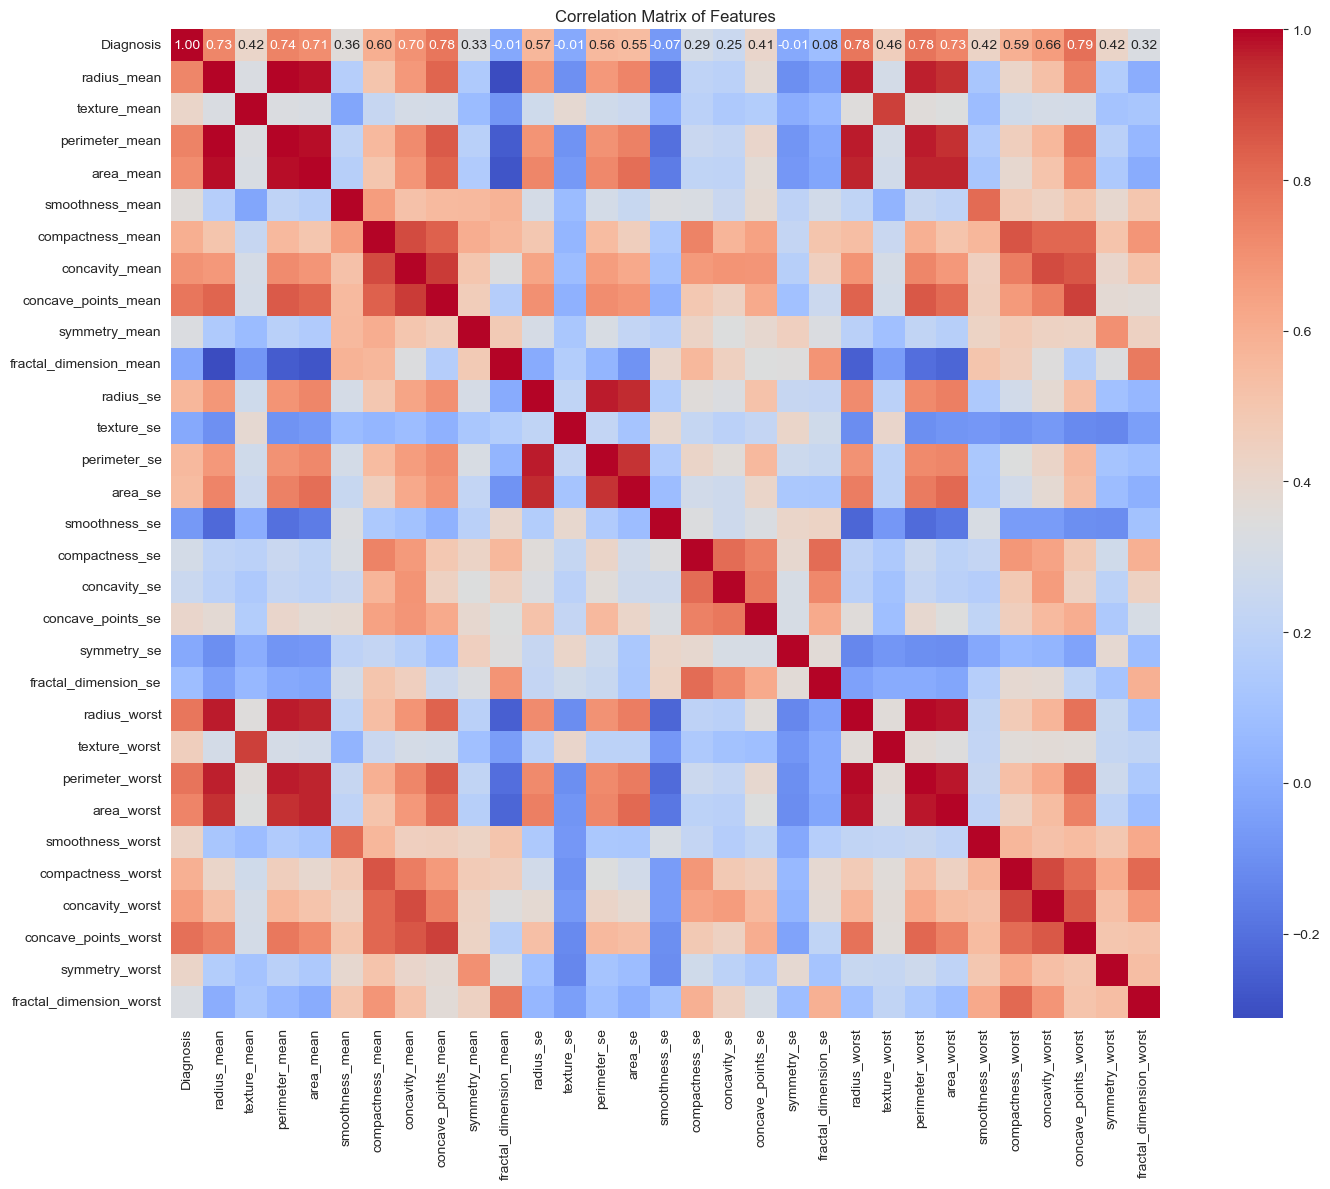

In [1348]:
# Get column names
cols = data.columns

# Compute correlation matrix
cm = np.corrcoef(data[cols].values.T)

# Create the heatmap with increased figure size
plt.figure(figsize=(16, 12))  # Adjust width and height as needed
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},  # Increase annotation size if needed
                 yticklabels=cols,
                 xticklabels=cols,
                 cmap='coolwarm')  # Choose a color map if desired

plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

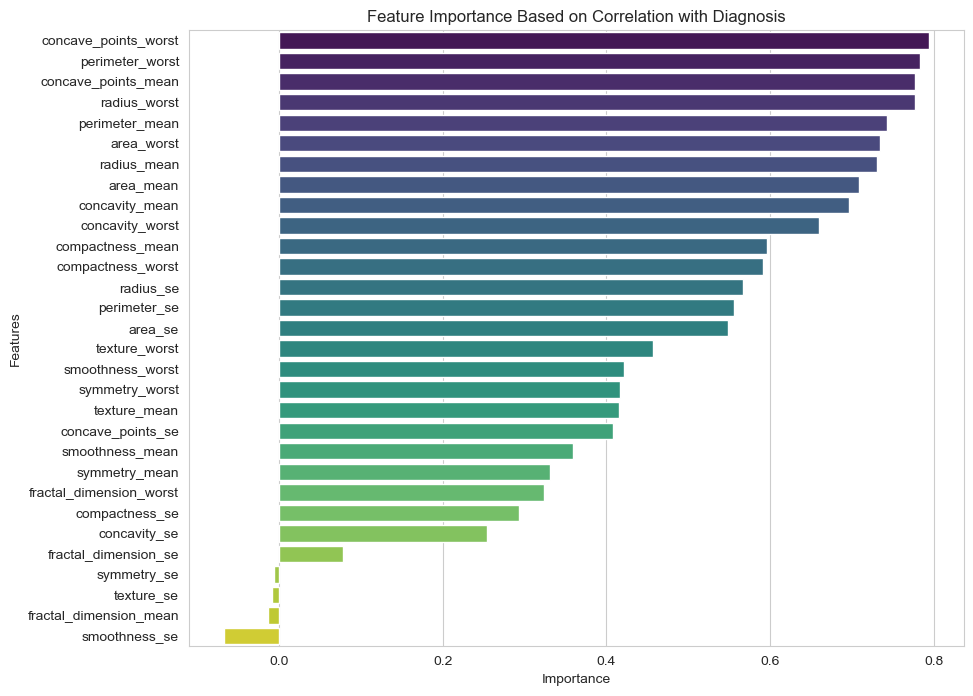

In [1349]:
# Calculate correlations with the target variable
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['Diagnosis'].drop('Diagnosis').sort_values(ascending=False)

# Create a DataFrame for plotting
feature_importances = pd.DataFrame({
    'Features': correlation_with_target.index,
    'Importance': correlation_with_target.values
})

# Plot feature importances based on correlation with the target
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Features', data=feature_importances, palette='viridis')
plt.title('Feature Importance Based on Correlation with Diagnosis')
sns.set_style("whitegrid")
plt.show()

**Examine higher collinearity between features to assess multicollinearity.**
We need to identify features with high multicollinearity and low unique contribution to the target variable. Features highly correlated with each other can be assessed for redundancy.


In [1351]:
import pandas as pd
import numpy as np


# Compute the correlation matrix
corr_matrix = data.corr()

# Function to find highly correlated feature pairs
def find_highly_correlated_features(corr_matrix, threshold=0.7):
    correlated_pairs = []
    
    # Iterate over the upper triangle of the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                feature1 = corr_matrix.columns[i]
                feature2 = corr_matrix.columns[j]
                correlated_pairs.append((feature1, feature2, corr_matrix.iloc[i, j]))
    
    return correlated_pairs

# Specify the correlation threshold
threshold = 0.8

# Find and display highly correlated features
correlated_features = find_highly_correlated_features(corr_matrix, threshold)

if correlated_features:
    print("Highly correlated feature pairs (correlation > {:.2f}):".format(threshold))
    for feature1, feature2, corr_value in correlated_features:
        print(f"{feature1} and {feature2}: {corr_value:.2f}")
else:
    print(f"No feature pairs with correlation above {threshold}.")



Highly correlated feature pairs (correlation > 0.80):
perimeter_mean and radius_mean: 1.00
area_mean and radius_mean: 0.99
area_mean and perimeter_mean: 0.99
concavity_mean and compactness_mean: 0.88
concave_points_mean and radius_mean: 0.82
concave_points_mean and perimeter_mean: 0.85
concave_points_mean and area_mean: 0.82
concave_points_mean and compactness_mean: 0.83
concave_points_mean and concavity_mean: 0.92
perimeter_se and radius_se: 0.97
area_se and area_mean: 0.80
area_se and radius_se: 0.95
area_se and perimeter_se: 0.94
concavity_se and compactness_se: 0.80
fractal_dimension_se and compactness_se: 0.80
radius_worst and radius_mean: 0.97
radius_worst and perimeter_mean: 0.97
radius_worst and area_mean: 0.96
radius_worst and concave_points_mean: 0.83
texture_worst and texture_mean: 0.91
perimeter_worst and radius_mean: 0.97
perimeter_worst and perimeter_mean: 0.97
perimeter_worst and area_mean: 0.96
perimeter_worst and concave_points_mean: 0.86
perimeter_worst and radius_wor

**Feature selection analysis:**


 **Impact Evaluation**: Initially, feature selection was based on analyzing correlations to avoid multicollinearity and removing features with minimal impact on performance. I assessed the influence of each feature on model performance by systematically removing features and observing the resulting changes in accuracy and confusion matrix metrics. Later, Recursive Feature Elimination (RFE) was used during training to further refine feature selection and enhance model performance.

 **Feature Removal**:
   - **Area Mean, Perimeter Mean**: These features showed high correlation with other metrics (e.g., radius mean, area worst) and provided redundant information.
   - **Texture Mean, Smoothness Mean, Fractal Mean, Fractal Worst, Texture SE**: Low correlation with the target variable and minimal impact on model performance.
   - **Compactness Mean, Concavity Mean**: High inter-correlation with other features; their removal did not significantly impact the model.
   - **Concave Points Mean, Symmetry Mean**: Removed due to their high correlation with other features and minimal additional value to the model’s predictive power.
   - **Perimeter SE, Area SE**: These features showed high correlation with other standard error features, leading to redundancy.
   - **Concavity SE, Concave Points SE, Symmetry SE, Compactness SE**: Limited contribution to model performance and high correlation with other features.
   - **Fractal Dimension SE**: Minimal correlation with the target variable and redundancy with other features.
   - **Radius Worst, Perimeter Worst**: High correlation with similar features and provided little additional predictive value.
   - **Concavity Worst, Fractal Dimension Worst**: High correlation with other metrics; removing them did not affect model accuracy.

 **Final Feature Set**: The final set of features was chosen based on their unique contribution to the model’s predictive power and low multicollinearity. This approach ensured a more robust and interpretable model.

In [1354]:
selected_features = [
    'Diagnosis','radius_mean','radius_se',
     'texture_worst','area_worst','smoothness_worst',
    'compactness_worst','concave_points_worst','symmetry_worst'
]


# Filter the DataFrame to keep only the selected features
data = data[selected_features]

**Checking for non-linear patterns**

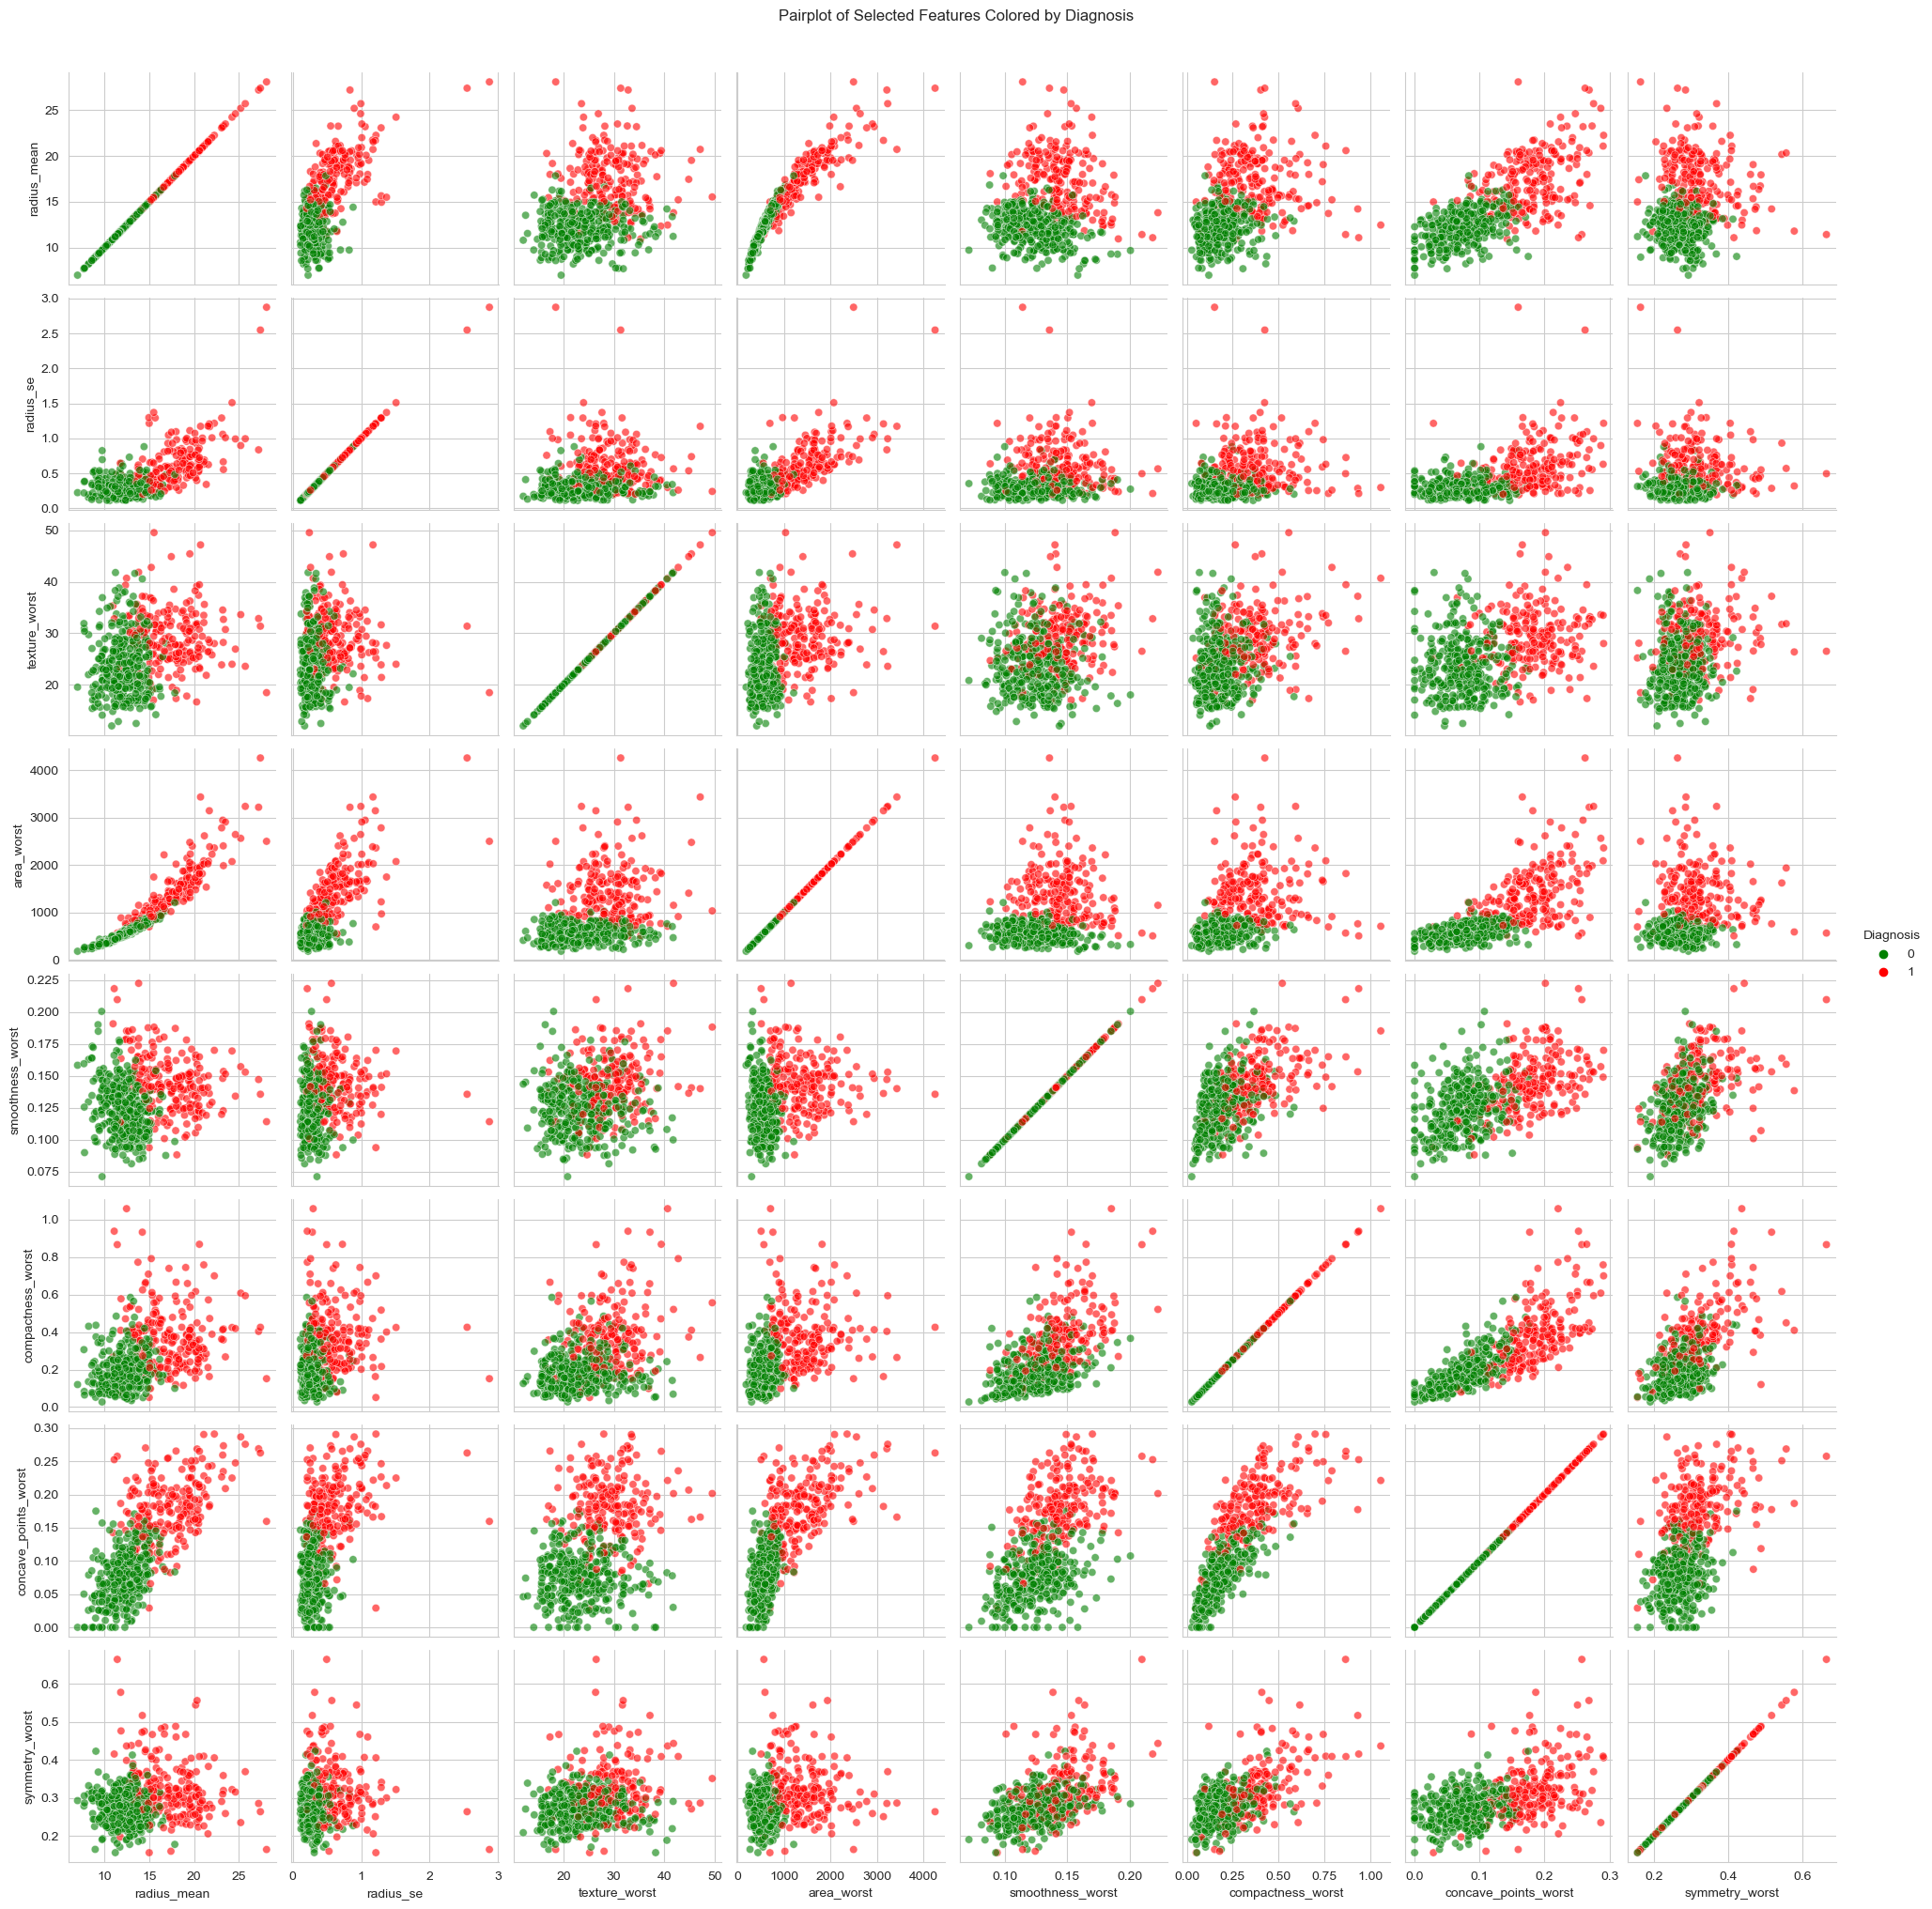

In [1356]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of selected features excluding 'Diagnosis'
features = [f for f in selected_features if f != 'Diagnosis' ]

# Pairwise scatter plots for selected features
sns.pairplot(data, vars=features, hue='Diagnosis',  palette=['green', 'red'], diag_kind=None, plot_kws={'alpha':0.6})
plt.suptitle('Pairplot of Selected Features Colored by Diagnosis', y=1.02)
plt.show()


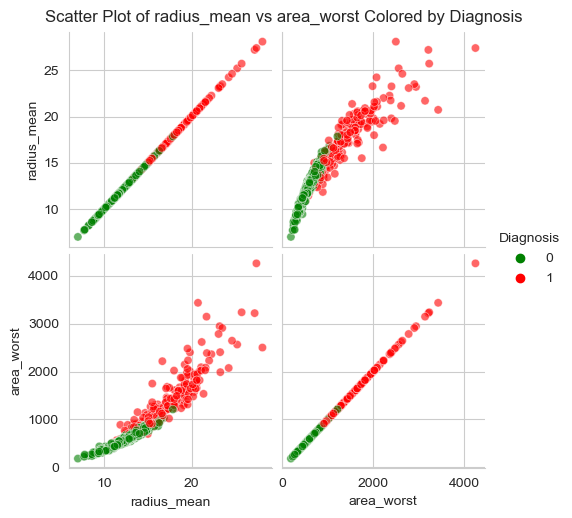

In [1357]:
# Specify the two features for plotting
features = ['radius_mean', 'area_worst']

# Create a DataFrame with only the selected features and the target variable
plot_data = data[features + ['Diagnosis']]

#Create scatter plot
sns.pairplot(plot_data, vars=features, hue='Diagnosis',palette=['green', 'red'], diag_kind=None, plot_kws={'alpha':0.6})
plt.suptitle('Scatter Plot of radius_mean vs area_worst Colored by Diagnosis', y=1.02)
plt.show()

To eradicate non-linear relationship, either area_worst or radius_mean can be transformed.

**Feature Transformation:** <br>



Since area grows quadratically with radius, applying a logarithmic transformation might help reduce the non-linearity.

In [1361]:
#Log Transformation

data['area_worst'] = np.log(data['area_worst'])


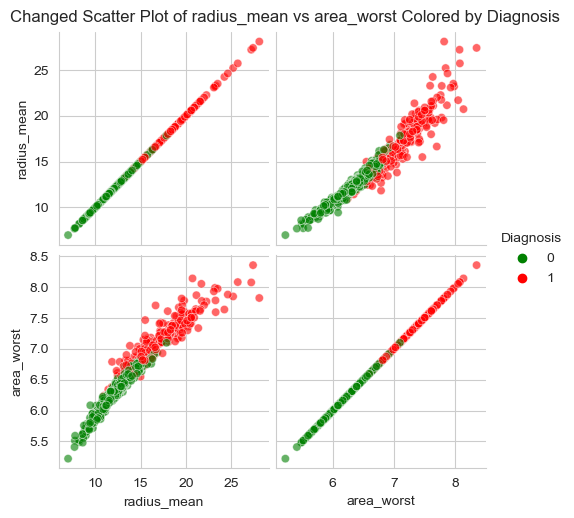

In [1362]:
# Specify the two features for plotting
features = ['radius_mean', 'area_worst']

# Create a DataFrame with only the selected features and the target variable
plot_data = data[features + ['Diagnosis']]

#Create scatter plot
sns.pairplot(plot_data, vars=features, hue='Diagnosis', palette=['green', 'red'], diag_kind=None, plot_kws={'alpha':0.6})
plt.suptitle('Changed Scatter Plot of radius_mean vs area_worst Colored by Diagnosis', y=1.02)
plt.show()

In [1363]:
data.head()

,Diagnosis,radius_mean,radius_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concave_points_worst,symmetry_worst
0,1,17.99,1.0950,17.33,7.610358,0.1622,0.6656,0.2654,0.4601
1,1,20.57,0.5435,23.41,7.578657,0.1238,0.1866,0.1860,0.2750
2,1,19.69,0.7456,25.53,7.443664,0.1444,0.4245,0.2430,0.3613
3,1,11.42,0.4956,26.50,6.341593,0.2098,0.8663,0.2575,0.6638
4,1,20.29,0.7572,16.67,7.362011,0.1374,0.2050,0.1625,0.2364


### **Model Training and Evaluation:**

**Logistic Regression:** Trained using the standardized features and evaluated using metrics such as accuracy, precision, recall, and F1-score. <br>
**Support Vector Machine (SVM):** Similarly, trained and evaluated using the same metrics for comparison.

---------------------------------------------------------------------------------------------------------------------------------------------

#### **Task 1. Train and evaluate a logistic regression classifier with RFE**

Trained using the standardized features and evaluated using metrics such as accuracy, precision, recall, and F1-score.

Selected features by RFE:
Index(['radius_mean', 'radius_se', 'texture_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concave_points_worst',
       'symmetry_worst'],
      dtype='object')
Train Accuracy after RFE: 0.9749
Test Accuracy after RFE: 0.9942
Precision after RFE: 1.0000
Recall after RFE: 0.9841
F1-Score after RFE: 0.9920


<Figure size 800x600 with 0 Axes>

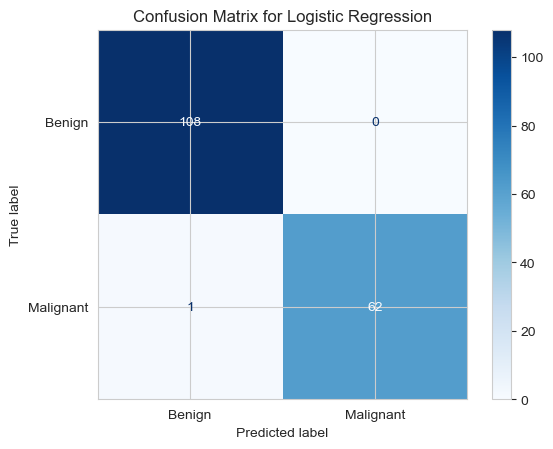

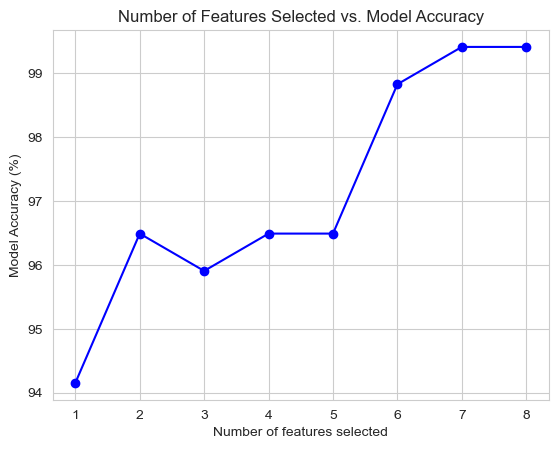

In [1414]:

# Split the data into features and target
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

# Step 2: Initialize RFE with Logistic Regression model and specify the number of features you want to select
n_features_to_select = 8  # You can adjust this based on your preference
rfe = RFE(estimator=log_reg, n_features_to_select=n_features_to_select)

# Step 3: Fit RFE on the training data
rfe.fit(X_train, y_train)

# Step 4: Check which features are selected
selected_rfe_features = X.columns[rfe.support_]

print("Selected features by RFE:")
print(selected_rfe_features)

# Step 5: Create a new dataset with the selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Step 6: Train Logistic Regression model on the selected features
log_reg.fit(X_train_rfe, y_train)

# Predict on the test set
y_test_pred_rfe = log_reg.predict(X_test_rfe)

# Step 7: Evaluate the performance using the selected features
train_accuracy_rfe = accuracy_score(y_train, log_reg.predict(X_train_rfe))
test_accuracy_rfe = accuracy_score(y_test, y_test_pred_rfe)
precision_rfe = precision_score(y_test, y_test_pred_rfe)
recall_rfe = recall_score(y_test, y_test_pred_rfe)
f1_rfe = f1_score(y_test, y_test_pred_rfe)

print(f"Train Accuracy after RFE: {train_accuracy_rfe:.4f}")
print(f"Test Accuracy after RFE: {test_accuracy_rfe:.4f}")
print(f"Precision after RFE: {precision_rfe:.4f}")
print(f"Recall after RFE: {recall_rfe:.4f}")
print(f"F1-Score after RFE: {f1_rfe:.4f}")

# Compute confusion matrix
conf_matrix_log = confusion_matrix(y_test, y_test_pred_log)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(conf_matrix_log, display_labels=['Benign', 'Malignant'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Plot number of features VS. model accuracy
plt.figure()
plt.plot(feature_counts, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel("Number of features selected")
plt.ylabel("Model Accuracy (%)")
plt.title("Number of Features Selected vs. Model Accuracy")
plt.grid(True)
sns.set_style("whitegrid")
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------

#### **Task 2. Train and evaluate a support vector machine classifier**

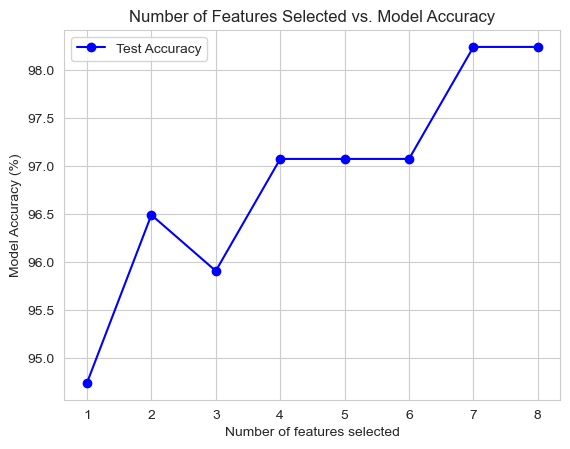

Optimal number of features: 7
Train Accuracy for Optimal Features: 97.2362%
Test Accuracy for Optimal Features: 98.2456%
Precision for Optimal Features: 0.9688
Recall for Optimal Features: 0.9841
F1-Score for Optimal Features: 0.9764
Selected features: ['radius_mean', 'radius_se', 'texture_worst', 'area_worst', 'smoothness_worst', 'concave_points_worst', 'symmetry_worst']


<Figure size 800x600 with 0 Axes>

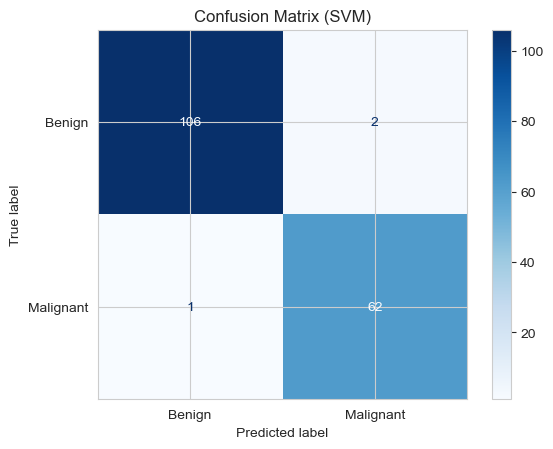

In [1416]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Define SVM model
svm_model = SVC(kernel='linear', random_state=42)  # Linear kernel for feature importance

# Split the data into features and target
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

# Lists to store metrics for different numbers of features
feature_counts = []
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []

# Iterate over different numbers of features
for n_features_to_select in range(1, X.shape[1] + 1):
    # Initialize RFE with SVM model and the current number of features to select
    rfe = RFE(estimator=svm_model, n_features_to_select=n_features_to_select)
    
    # Fit RFE on the training data
    rfe.fit(X_train, y_train)
    
    # Transform data with selected features
    X_train_rfe = rfe.transform(X_train)
    X_test_rfe = rfe.transform(X_test)
    
    # Train SVM model on the selected features
    svm_model.fit(X_train_rfe, y_train)
    
    # Predict on the test set
    y_test_pred_rfe = svm_model.predict(X_test_rfe)
    
    # Compute metrics
    train_accuracy = accuracy_score(y_train, svm_model.predict(X_train_rfe))
    test_accuracy = accuracy_score(y_test, y_test_pred_rfe)
    precision = precision_score(y_test, y_test_pred_rfe)
    recall = recall_score(y_test, y_test_pred_rfe)
    f1 = f1_score(y_test, y_test_pred_rfe)
    
    # Append metrics to lists
    feature_counts.append(n_features_to_select)
    train_accuracies.append(train_accuracy * 100)  # Convert to percentage
    test_accuracies.append(test_accuracy * 100)    # Convert to percentage
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Plot number of features VS. model accuracy
plt.figure()
plt.plot(feature_counts, test_accuracies, marker='o', linestyle='-', color='b', label='Test Accuracy')
plt.xlabel("Number of features selected")
plt.ylabel("Model Accuracy (%)")
plt.title("Number of Features Selected vs. Model Accuracy")
plt.grid(True)
sns.set_style("whitegrid")
plt.legend()
plt.show()

# Output the optimal number of features and their metrics
optimal_n_features = feature_counts[test_accuracies.index(max(test_accuracies))]
print('Optimal number of features:', optimal_n_features)
print('Train Accuracy for Optimal Features: {:.4f}%'.format(train_accuracies[feature_counts.index(optimal_n_features)]))
print('Test Accuracy for Optimal Features: {:.4f}%'.format(test_accuracies[feature_counts.index(optimal_n_features)]))
print('Precision for Optimal Features: {:.4f}'.format(precisions[feature_counts.index(optimal_n_features)]))
print('Recall for Optimal Features: {:.4f}'.format(recalls[feature_counts.index(optimal_n_features)]))
print('F1-Score for Optimal Features: {:.4f}'.format(f1_scores[feature_counts.index(optimal_n_features)]))

# Refitting with optimal number of features to get selected features
rfe_optimal = RFE(estimator=svm_model, n_features_to_select=optimal_n_features)
rfe_optimal.fit(X_train, y_train)
selected_features = X.columns[rfe_optimal.support_]
print('Selected features:', list(selected_features))

# Transform data with the optimal number of features
X_train_optimal = rfe_optimal.transform(X_train)
X_test_optimal = rfe_optimal.transform(X_test)

# Train SVM model on the optimal features
svm_model.fit(X_train_optimal, y_train)

# Predict on the test set
y_test_pred_optimal = svm_model.predict(X_test_optimal)

# Compute confusion matrix for the optimal number of features
conf_matrix_svm_optimal = confusion_matrix(y_test, y_test_pred_optimal)

# Plot confusion matrix for the optimal number of features
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(conf_matrix_svm_optimal, display_labels=['Benign', 'Malignant'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix (SVM)')
plt.show()


---------------------------------------------------------------------------------------------------------------------------------------------

#### **Task 3: Compare the two models in terms of accuracy, precision, recall & F1-score**

<Figure size 800x600 with 0 Axes>

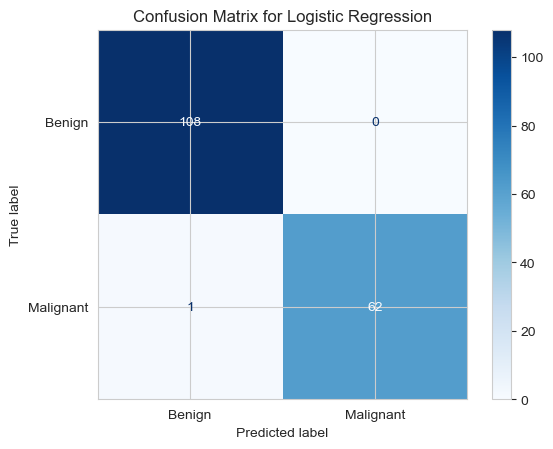

<Figure size 800x600 with 0 Axes>

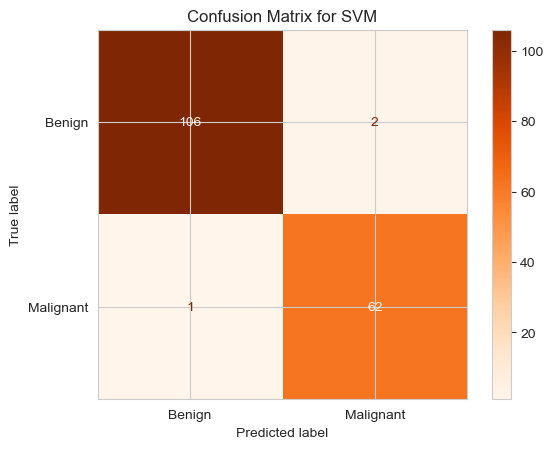

F1 Score for Logistic Regression: 0.9920
F1 Score for Support Vector Machine: 0.9764


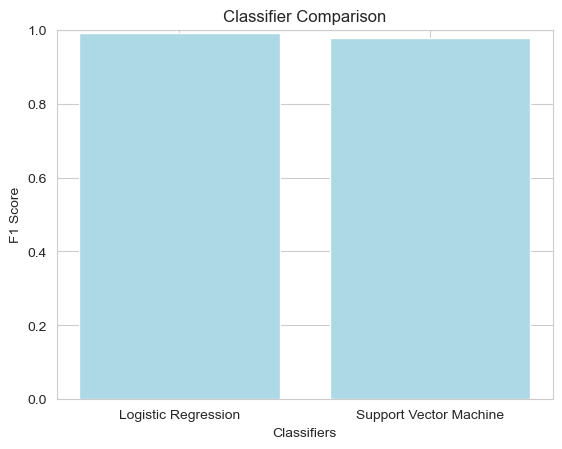

In [1375]:
# Example usage
# Compute confusion matrix for Logistic Regression
# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(conf_matrix_log, display_labels=['Benign', 'Malignant'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


# Compute confusion matrix for SVM
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(conf_matrix_svm, display_labels=['Benign', 'Malignant'])
disp.plot(cmap='Oranges', values_format='d')
plt.title('Confusion Matrix for SVM')
plt.show()

#Check F1 score:
from sklearn.metrics import f1_score


# Extract F1 Scores for comparison
f1_scores = {
    'Logistic Regression': f1_score(y_test, y_test_pred_log),
    'Support Vector Machine': f1_score(y_test, y_test_pred_svm)
}

# Print the F1 scores
for clf, score in f1_scores.items():
    print(f"F1 Score for {clf}: {score:.4f}")

# Prepare data for plotting
classifiers = list(f1_scores.keys())
scores = list(f1_scores.values())

# Define a lighter color for the bars
light_color = '#ADD8E6'  # Light Blue

# Plot the F1 Scores for Logistic Regression and SVM
plt.bar(classifiers, scores, color=light_color, align='center')
plt.title('Classifier Comparison')
plt.xlabel('Classifiers')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.show()


---------------------------------------------------------------------------------------------------------------------------------------------

#### **Task 4. Which of the two models would you recommend for this application.**

Based on the evaluation metrics, I recommend the **Logistic Regression model** for this application due to following reasons:

**Accuracy:** Logistic Regression has a higher test accuracy (0.9942) compared to SVM (0.9825). This suggests better performance in predicting unseen data.

**Precision and Recall:** Both models have similar precision (Logistic Regression: 1.000 vs. SVM: 0.9825) and recall (Logistic Regression: 0.9841 vs. SVM: 0.9841). However, Logistic Regression shows slightly better precision, which might be more beneficial if correctly identifying positives is crucial.

**F1-Score:** The F1-score for Logistic Regression is 0.9920, which is higher than the SVM's F1-score of 0.9764. This suggests a better balance between precision and recall for Logistic Regression.

**Confusion Matrix:** Logistic Regression’s confusion matrix indicates fewer misclassifications with only 1 false positive and 0 false negative, compared to SVM's confusion matrix which shows higher misclassification rates.

**Overall, Logistic Regression demonstrates better accuracy, precision, recall, and F1-score, making it the preferred model for this application.**

---------------------------------------------------------------------------------------------------------------------------------------------

#### **5. What would you do next to improve the model performance?**

Our model has already demonstrated strong performance. However, if it were not performing well, I would conduct checks in the following areas to enhance its effectiveness: <br>
**1. Feature Engineering**
- **Create New Features**: Derive new features based on domain knowledge, such as interaction terms (multiplying two or more features) or polynomial features (e.g., squaring a feature).
- **Dimensionality Reduction**: Use techniques like PCA (Principal Component Analysis) to reduce noise and focus on the most important features.
- **Handle Non-linearities**: Consider transforming features (e.g., logarithmic, square root) to better capture non-linear relationships.

**2. Model Tuning and Optimization**
- **Hyperparameter Tuning**: Fine-tune model parameters such as `C` (inverse of regularization strength) in logistic regression using techniques like Grid Search or Random Search to find the optimal values.


**3. Trying out Different Models**

- **Logistic Regression**: Start with logistic regression as a baseline.
- **Decision Trees/Random Forests**: Can handle complex relationships and feature interactions.
- **Gradient Boosting Machines (GBM), XGBoost, LightGBM**: Powerful models that build ensembles of weak learners to improve accuracy.


**4. Handling Class Imbalance**

- **Class Weights**: Adjust class weights in the logistic regression model or other classifiers to give more importance to the minority class.

- **Over-sampling/Under-sampling**: Use SMOTE (Synthetic Minority Over-sampling Technique) or RandomUnderSampler to balance the class distribution.

**5. Regularization Techniques**

- **L2 Regularization (Ridge Regression)**: This is already included in Logistic Regression, but tuning the regularization parameter C is key.

- **L1 Regularization (Lasso Regression)**: Can also be used if we want to enforce sparsity, i.e., eliminate less important features.

**6. Cross-validation**

- Use K-Fold Cross-Validation to better evaluate the performance of the model and ensure it's not overfitting to a particular train-test split.

**7. Address Outliers**

- **Outlier Detection**: Use advanced methods for outlier detection:
  - Isolation Forest
  - Elliptic Envelope
  - Local Outlier Factor (LOF)

**8. Further Data Preprocessing**

- **Missing Data Handling**: If missing values are present, consider different strategies like imputation using KNNImputer or mean/median imputation.

- **Scaling**: Try different scaling techniques, like MinMaxScaler or RobustScaler, especially if there are outliers.

**9. Ensemble Learning**

- **Combine Multiple Models**: Use ensemble techniques like VotingClassifier or stacking to improve predictive performance.

**10. Feature Importance and Elimination**

- **Recursive Feature Elimination (RFE)** or **Tree-based Feature Importance** can be used to further fine-tune feature selection and keep only the most relevant features.


# **Conclusion**
 Logistic Regression outperformed SVM, achieving roughly 99% accuracy in classifying breast cancer tumors. Key predictive features identified were: Diagnosis, radius mean, radius se, texture worst, area worst, smoothness worst, compactness worst, concave points worst, and symmetry worst. This lab underscores the importance of careful model selection and evaluation in developing effective classification systems, offering valuable insights for medical diagnostics.






